In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
train = pd.read_csv('processed_data/train_translated_cleaned.csv')
test = pd.read_csv('processed_data/test_translated_cleaned.csv')
test_y = pd.read_csv("processed_data/test_labels_cleaned.csv")

In [3]:
train['comment_text'] = train['comment_text'].apply(lambda x: np.str_(x))
test['comment_text'] = test['comment_text'].apply(lambda x: np.str_(x))

#split 20% of train as validation set
X = train.iloc[:,1]
y = train.iloc[:,2:]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=321)

In [4]:
#convert text to TFIDF
tf_vec = TfidfVectorizer(decode_error='ignore',stop_words='english')
train_tf = tf_vec.fit_transform(X_train)
validation_tf = tf_vec.transform(X_validation)

In [5]:
print(tf_vec.get_feature_names())

['aa', 'aaba', 'aabove', 'aacd', 'aachen', 'aachi', 'aadd', 'aadmi', 'aaffect', 'aafia', 'aaflight', 'aafs', 'aagadu', 'aages', 'aagf', 'aaghh', 'aagin', 'aah', 'aahank', 'aahh', 'aahs', 'aai', 'aaiha', 'aajacksoniv', 'aajonus', 'aakash', 'aake', 'aalborg', 'aalertbot', 'aalexa', 'aaliya', 'aaliyah', 'aaliyahremembered', 'aals', 'aalst', 'aamir', 'aand', 'aanda', 'aandahl', 'aandc', 'aande', 'aandm', 'aandr', 'aandw', 'aang', 'aannyywwhheerree', 'aany', 'aaot', 'aapropriate', 'aarabs', 'aarau', 'aardman', 'aardsma', 'aardsman', 'aardvark', 'aardvarks', 'aare', 'aarem', 'aargh', 'aarionrhod', 'aarne', 'aaroamal', 'aarohi', 'aaron', 'aaroncrick', 'aaronic', 'aaronsw', 'aaround', 'aarp', 'aarrggh', 'aarrow', 'aatc', 'aave', 'aaviksoo', 'aavishkaar', 'aaw', 'aaww', 'aaye', 'aayege', 'abacha', 'abacination', 'aback', 'abaco', 'abacus', 'abad', 'abadan', 'abaddon', 'abade', 'abagnale', 'abalessa', 'abali', 'abanagi', 'abandon', 'abandonded', 'abandoned', 'abandoning', 'abandonment', 'abandon

In [6]:
#train different model for each toxicity
col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
# create empty array to contain predictions
pred_validation = np.zeros((X_validation.shape[0],len(col)))
logReg = LogisticRegression()
for i,x in enumerate(col):
    print('####Working on ',x , ' ####')
    logReg.fit(train_tf, y_train[x])
    pred_validation[:,i] = logReg.predict(validation_tf)

####Working on  toxic  ####


/home/nelsontang/cmpt413/nlpclass-1207-g-OutputError/project/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


####Working on  severe_toxic  ####
####Working on  obscene  ####
####Working on  threat  ####
####Working on  insult  ####
####Working on  identity_hate  ####


In [7]:
for i,x in enumerate(col):
    print(x,"Accuracy Score on validation:",metrics.accuracy_score(y_validation[x], pred_validation[:,i]))

toxic Accuracy Score on validation: 0.9537834873883754
severe_toxic Accuracy Score on validation: 0.9900360332132226
obscene Accuracy Score on validation: 0.9761554128152906
threat Accuracy Score on validation: 0.9971486761710794
insult Accuracy Score on validation: 0.9689801033996553
identity_hate Accuracy Score on validation: 0.9915086949710168


In [8]:
#train different model for each toxicity
col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
# create empty array to contain predictions
pred_validation = np.zeros((X_validation.shape[0],len(col)))
logReg = LogisticRegression(C = 1)
for i,x in enumerate(col):
    print('####Working on ',x , ' ####')
    logReg.fit(train_tf, y_train[x])
    pred_validation[:,i] = logReg.predict(validation_tf)

####Working on  toxic  ####


/home/nelsontang/cmpt413/nlpclass-1207-g-OutputError/project/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


####Working on  severe_toxic  ####
####Working on  obscene  ####
####Working on  threat  ####
####Working on  insult  ####
####Working on  identity_hate  ####


In [9]:
for i,x in enumerate(col):
    print(x,"Accuracy Score on Test:",metrics.accuracy_score(y_validation[x], pred_validation[:,i]))

toxic Accuracy Score on Test: 0.9537834873883754
severe_toxic Accuracy Score on Test: 0.9900360332132226
obscene Accuracy Score on Test: 0.9761554128152906
threat Accuracy Score on Test: 0.9971486761710794
insult Accuracy Score on Test: 0.9689801033996553
identity_hate Accuracy Score on Test: 0.9915086949710168


In [10]:
#Tuning parameter C
c=[0.01,0.1,1,10,100]


df = pd.DataFrame(np.array([ [0,0,0,0,0,0], [0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]),
                   columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])

acc_temp = []
best_accuracy = 0
best_c = 0

col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
# create empty array to contain predictions
pred_validation = np.zeros((X_validation.shape[0],len(col)))

for i,x in enumerate(col):
    for j in c:
        logReg = LogisticRegression(C = j, max_iter=5000)
        logReg.fit(train_tf, y_train[x])
        pred_validation[:,i] = logReg.predict(validation_tf)
        temp = metrics.accuracy_score(y_validation[x], pred_validation[:,i])
        acc_temp.append(temp)
        if temp > best_accuracy:
            best_accuracy = temp
            best_c = j
    df[x] = acc_temp
    print('The best changing the regularisation(C) value is ', best_c, ' for ', x, '; The accuracy score is: ', best_accuracy)
    best_c = 0
    best_accuracy = 0
    acc_temp = []

The best changing the regularisation(C) value is  10  for  toxic ; The accuracy score is:  0.9574181419395269
The best changing the regularisation(C) value is  1  for  severe_toxic ; The accuracy score is:  0.9900360332132226
The best changing the regularisation(C) value is  10  for  obscene ; The accuracy score is:  0.978192072693091
The best changing the regularisation(C) value is  10  for  threat ; The accuracy score is:  0.9972113426288579
The best changing the regularisation(C) value is  10  for  insult ; The accuracy score is:  0.9697007676641077
The best changing the regularisation(C) value is  1  for  identity_hate ; The accuracy score is:  0.9915086949710168


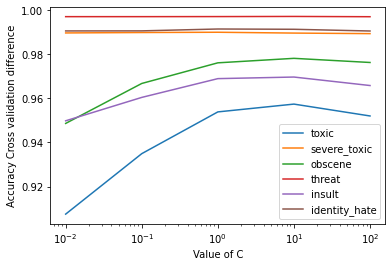

In [11]:
pyplot.subplot()
for i in col:
    pyplot.plot(c,df[i])
    
pyplot.xscale("log")
pyplot.xlabel("Value of C")
pyplot.ylabel("Accuracy Cross validation difference")
pyplot.legend(col)
pyplot.show()

In [12]:
#Tuning parameter C
c=[0.01,0.1,1,10,100]

best_accuracy = 0
best_c = 0

col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
# create empty array to contain predictions
pred_validation = np.zeros((X_validation.shape[0],len(col)))

for i,x in enumerate(col):
    for j in c:
        logReg = LogisticRegression(C = j, max_iter=5000)
        logReg.fit(train_tf, y_train[x])
        pred_validation[:,i] = logReg.predict(validation_tf)
        temp = metrics.accuracy_score(y_validation[x], pred_validation[:,i])
        if temp > best_accuracy:
            best_accuracy = temp
            best_c = j
    print('The best changing the regularisation(C) value is ', best_c, ' for ', x, '; The accuracy score is: ', best_accuracy)
    best_c = 0
    best_accuracy = 0

The best changing the regularisation(C) value is  10  for  toxic ; The accuracy score is:  0.9574181419395269
The best changing the regularisation(C) value is  1  for  severe_toxic ; The accuracy score is:  0.9900360332132226
The best changing the regularisation(C) value is  10  for  obscene ; The accuracy score is:  0.978192072693091
The best changing the regularisation(C) value is  10  for  threat ; The accuracy score is:  0.9972113426288579
The best changing the regularisation(C) value is  10  for  insult ; The accuracy score is:  0.9697007676641077
The best changing the regularisation(C) value is  1  for  identity_hate ; The accuracy score is:  0.9915086949710168


From above results we can see the best parameter C is 1 for toxic, obscene, threat and insult, 0.01 for severe_toxic, and 10 for identity.

In [13]:
pred_test = np.zeros((test.shape[0],len(col)))
col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
#create a array contain best parameter c
best_c = [10, 1, 10, 10, 10, 1]

#train_tf = tf_vec.fit_transform(train['comment_text'])
test_tf = tf_vec.transform(test['comment_text'])

#log start time
starttime = datetime.datetime.now()

for i,x in enumerate(col):
    print('####Working on ',x , ' ####')
    logReg = LogisticRegression(C = best_c[i], max_iter=5000)
    logReg.fit(train_tf, y_train[x])
    pred_test[:,i] = logReg.predict(test_tf)

#log end time
endtime = datetime.datetime.now()

####Working on  toxic  ####
####Working on  severe_toxic  ####
####Working on  obscene  ####
####Working on  threat  ####
####Working on  insult  ####
####Working on  identity_hate  ####


In [14]:
#results
for i,x in enumerate(col):
    print(x,"Accuracy Score on Test:",metrics.accuracy_score(test_y[x], pred_test[:,i]))
print('Total training time: ' , endtime - starttime)

toxic Accuracy Score on Test: 0.9276938947763294
severe_toxic Accuracy Score on Test: 0.9929975929225672
obscene Accuracy Score on Test: 0.9639250992528682
threat Accuracy Score on Test: 0.9968582950389197
insult Accuracy Score on Test: 0.9615805433117635
identity_hate Accuracy Score on Test: 0.9899809309450124
Total training time:  0:00:56.883567


In [15]:
total_score = 0
for i,x in enumerate(col):
    score = metrics.accuracy_score(test_y[x], pred_test[:,i])
    total_score= total_score + score
print('The average score for six toxicities is: ', round(total_score/6 , 4) )

The average score for six toxicities is:  0.9722
